# 1. Google Play Store Apps Data
This dataset consists of web scraped data of more than 10,000 Google Play Store apps and 60,000 app reviews. `apps_data.csv` consists of data about the apps such as category, number of installs, and price. `review_data.csv` holds reviews of the apps, including the text of the review and sentiment scores. 

# Background 

You are working for an app developer. They are in the process of brainstorming a new app. They want to ensure that their next app scores a high review on the app store, as this can lead to the app being featured on the store homepage. They would like you analyze what factors increase the rating an app will receive. They would also like to know what impact reviews have on the final score.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
file = r'd:\rg67266\Downloads\apps_data.csv'

In [194]:
df = pd.read_csv(file)

In [195]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2. Cleaning the data

Data cleaning is an essential task to any data science project. Though it can be a tedious and time consuming, it's value should never be underestimated

By looking at a sample of the data set, we can see some entries in columns like *Price* and *Installs* have no numeric character. This prevent us from performing numeric operation on these colums.Ideally, Price and Installs should contain niumbers 0 - 9. We will proceed to eliminate these characters from above mentioned columns

In [196]:
df.shape

(10841, 13)

In [197]:
df = df.drop_duplicates()
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10320,Santa Fe FCU Mobile Banking,FINANCE,4.3,12,9.0M,"1,000+",Free,0,Everyone,Finance,"January 22, 2018",1.18.4,4.0 and up
2668,Flipp - Weekly Shopping,SHOPPING,4.6,85858,Varies with device,"10,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",Varies with device,Varies with device
8246,DC Comics,COMICS,4.2,25673,Varies with device,"1,000,000+",Free,0,Teen,Comics,"June 5, 2018",Varies with device,Varies with device
2149,codeSpark Academy & The Foos,FAMILY,4.1,4522,57M,"500,000+",Free,0,Everyone,Educational;Education,"June 21, 2018",2.19.01,4.1 and up
7076,BZ Straußenführer,TRAVEL_AND_LOCAL,4.3,291,14M,"10,000+",Free,0,Everyone,Travel & Local,"March 17, 2016",1.2.3,4.0 and up


In [198]:
col_to_clean = ['Price','Installs', 'Reviews']

for i in col_to_clean:
    print(df[i].value_counts().reset_index())
    

      Price  count
0         0   9592
1     $0.99    146
2     $2.99    125
3     $1.99     73
4     $4.99     70
..      ...    ...
88  $389.99      1
89   $19.90      1
90    $1.75      1
91   $14.00      1
92    $1.04      1

[93 rows x 2 columns]
          Installs  count
0       1,000,000+   1488
1      10,000,000+   1132
2         100,000+   1129
3          10,000+   1033
4           1,000+    890
5             100+    710
6       5,000,000+    683
7         500,000+    517
8          50,000+    474
9           5,000+    469
10             10+    385
11    100,000,000+    369
12            500+    328
13     50,000,000+    272
14             50+    204
15              5+     82
16              1+     67
17    500,000,000+     61
18  1,000,000,000+     49
19              0+     14
20               0      1
21            Free      1
      Reviews  count
0           0    593
1           1    272
2           2    213
3           3    170
4           4    137
...       ...    ...
5997

In [199]:
char_to_remove = ['+', ',', '$', 'M']
col_to_clean = ['Price','Installs', 'Reviews']

for col in col_to_clean:
    # Loop for each char in chars_to_remove
    for char in char_to_remove:
        # Replace the character with an empty string
        df[col] = df[col].apply(lambda x: x.replace(char, ''))
        col_to_clean = ['Price','Installs', 'Reviews']
# Print a summary of the apps dataframe


C:\Users\rg67266\AppData\Local\Temp\ipykernel_10356\2890695407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: x.replace(char, ''))
C:\Users\rg67266\AppData\Local\Temp\ipykernel_10356\2890695407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: x.replace(char, ''))
C:\Users\rg67266\AppData\Local\Temp\ipykernel_10356\2890695407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [200]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [201]:
target = ['Free', 'Everyone']
col_to_clean = ['Price','Installs']

for col in col_to_clean:
   
    for char in target:
        
        df[col] = df[col].apply(lambda x: x.replace(char, '0'))
        
        
df.sample(8)

C:\Users\rg67266\AppData\Local\Temp\ipykernel_10356\669609266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: x.replace(char, '0'))
C:\Users\rg67266\AppData\Local\Temp\ipykernel_10356\669609266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: x.replace(char, '0'))
C:\Users\rg67266\AppData\Local\Temp\ipykernel_10356\669609266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6140,Board Game Stats: Play tracking for tabletop g...,LIFESTYLE,4.6,275,3.9M,5000,Paid,2.99,Everyone,Lifestyle,"July 17, 2018",2.8.3,4.1 and up
2828,Camera360 Lite - Selfie Camera,PHOTOGRAPHY,4.4,221858,Varies with device,10000000,Free,0,Everyone,Photography,"August 1, 2018",Varies with device,4.1 and up
8906,du View,FAMILY,3.8,935,22M,50000,Free,0,Teen,Entertainment,"March 26, 2018",6.4.1,4.3 and up
6102,My Virtual Boyfriend,FAMILY,4.3,105,51M,1000,Paid,0.99,Teen,Casual,"February 17, 2017",3.6,2.3.3 and up
5834,Ay Yıldız - Xperia Live Theme,PERSONALIZATION,NaN,0,2.9M,10,Paid,0.99,Everyone,Personalization,"December 26, 2017",1.0.0,4.4 and up
9533,Exiled Kingdoms RPG,FAMILY,4.6,49210,99M,1000000,Free,0,Everyone 10+,Role Playing,"July 5, 2018",1.2.1107,4.1 and up
6292,BI Barcode Scanner,PRODUCTIVITY,NaN,0,473k,10,Paid,0.99,Everyone,Productivity,"June 13, 2014",2.2,2.2 and up
7759,QC,FAMILY,NaN,4,34M,100,Free,0,Everyone,Puzzle,"October 5, 2016",1.0,4.0.3 and up


# 3. Correct The Data Type

From the previous task we noticed that Installs and Price were categorized as object data type (and not int or float) as we would like. This is because these two columns originally had mixed input types: digits and special characters.

The features that we will be focusing on the  most are are Installs, Rating and Price. We still need to work on Installs and Price to make them numeric.

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [203]:
df['Rating'] = df['Rating'].fillna(0)

C:\Users\rg67266\AppData\Local\Temp\ipykernel_10356\1262226095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = df['Rating'].fillna(0)


In [204]:
df = df.astype({
    'Rating': int,
    'Installs': float,
    'Price': float,
    'Reviews' : float
})


In [205]:
def datetime_change(str):
    date = pd.to_datetime(str)
    return date

In [206]:
df[df['Last Updated'] == '1.0.19']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3.0,"1,000+",0.0,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [207]:
df['Last Updated'] = df['Last Updated'].str.replace('1.0.19','January 01 2019')

In [208]:
df['Last Updated'] = df['Last Updated'].apply(datetime_change)

In [209]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          10358 non-null  int32         
 3   Reviews         10358 non-null  float64       
 4   Size            10358 non-null  object        
 5   Installs        10358 non-null  float64       
 6   Type            10357 non-null  object        
 7   Price           10358 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10358 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(8)
memory usage: 1.1+ MB


In [211]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

<Axes: >

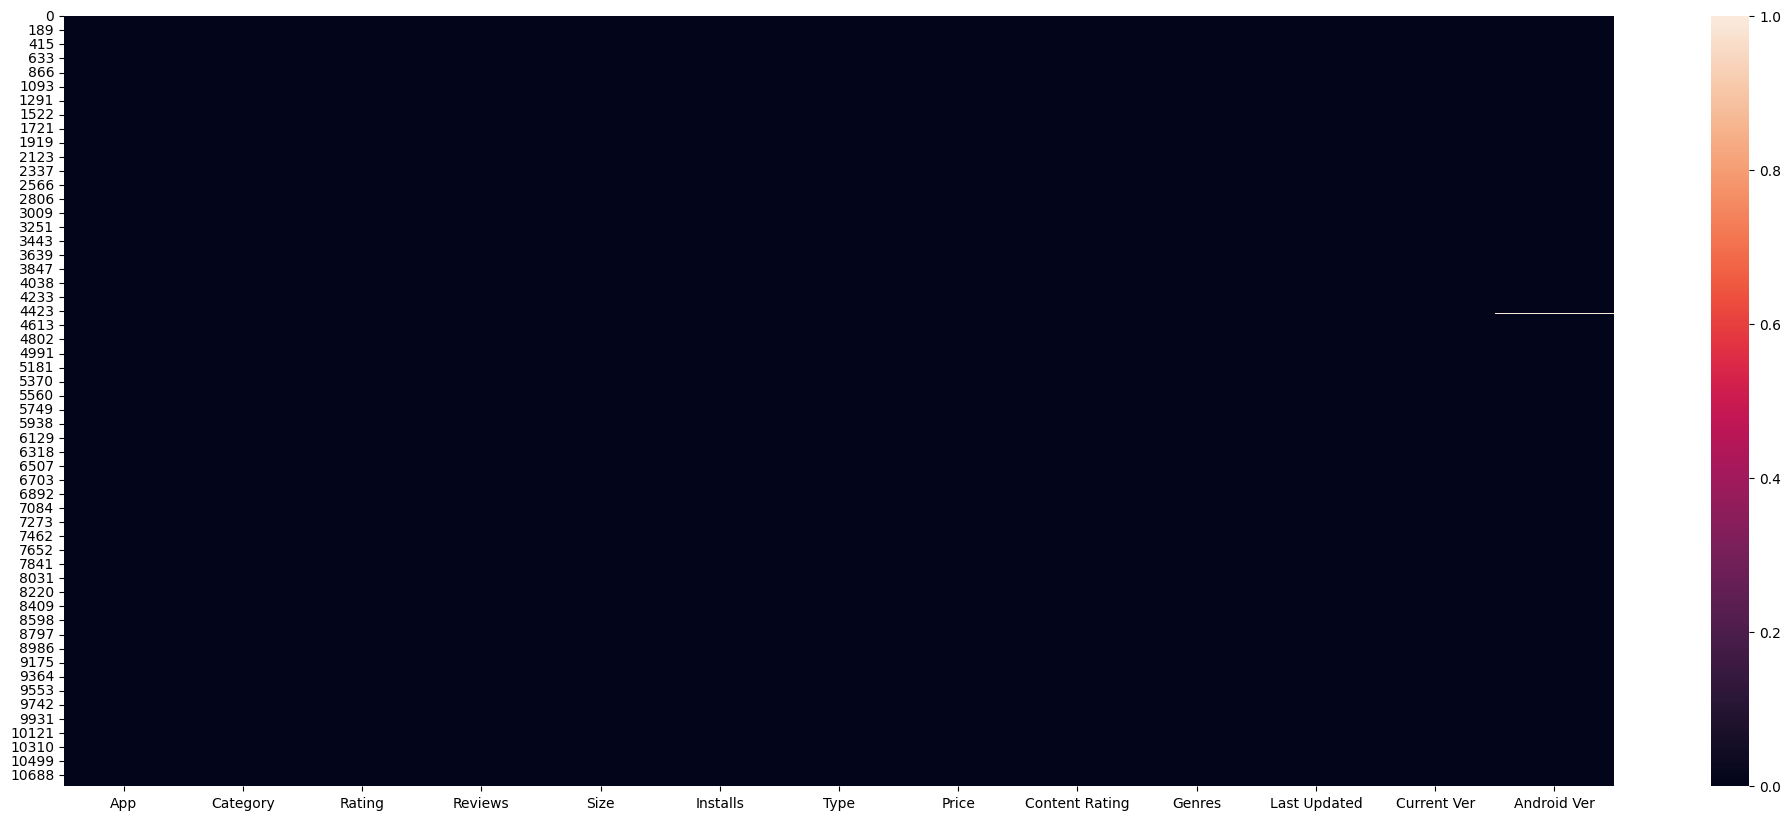

In [212]:
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull())

# 4. Exploring App Categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:
<ol>
    <li>Which category has the highest share of (active) apps in the market?</li>
    <li>Is any specific category dominating the market?</li>
    <li>Which categories have the fewest number of apps?</li>
    <li>What factors contribute to an app receiving an high content rating?</li>
</ol>
Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [213]:
df.nlargest(10)

TypeError: DataFrame.nlargest() missing 1 required positional argument: 'columns'

In [ ]:
Category_Value_count = df['Category'].value_counts().nlargest(10).reset_index()
Category_Value_count

,Category,count
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


<Axes: title={'center': 'Share of Each Category'}, xlabel='Category', ylabel='count'>

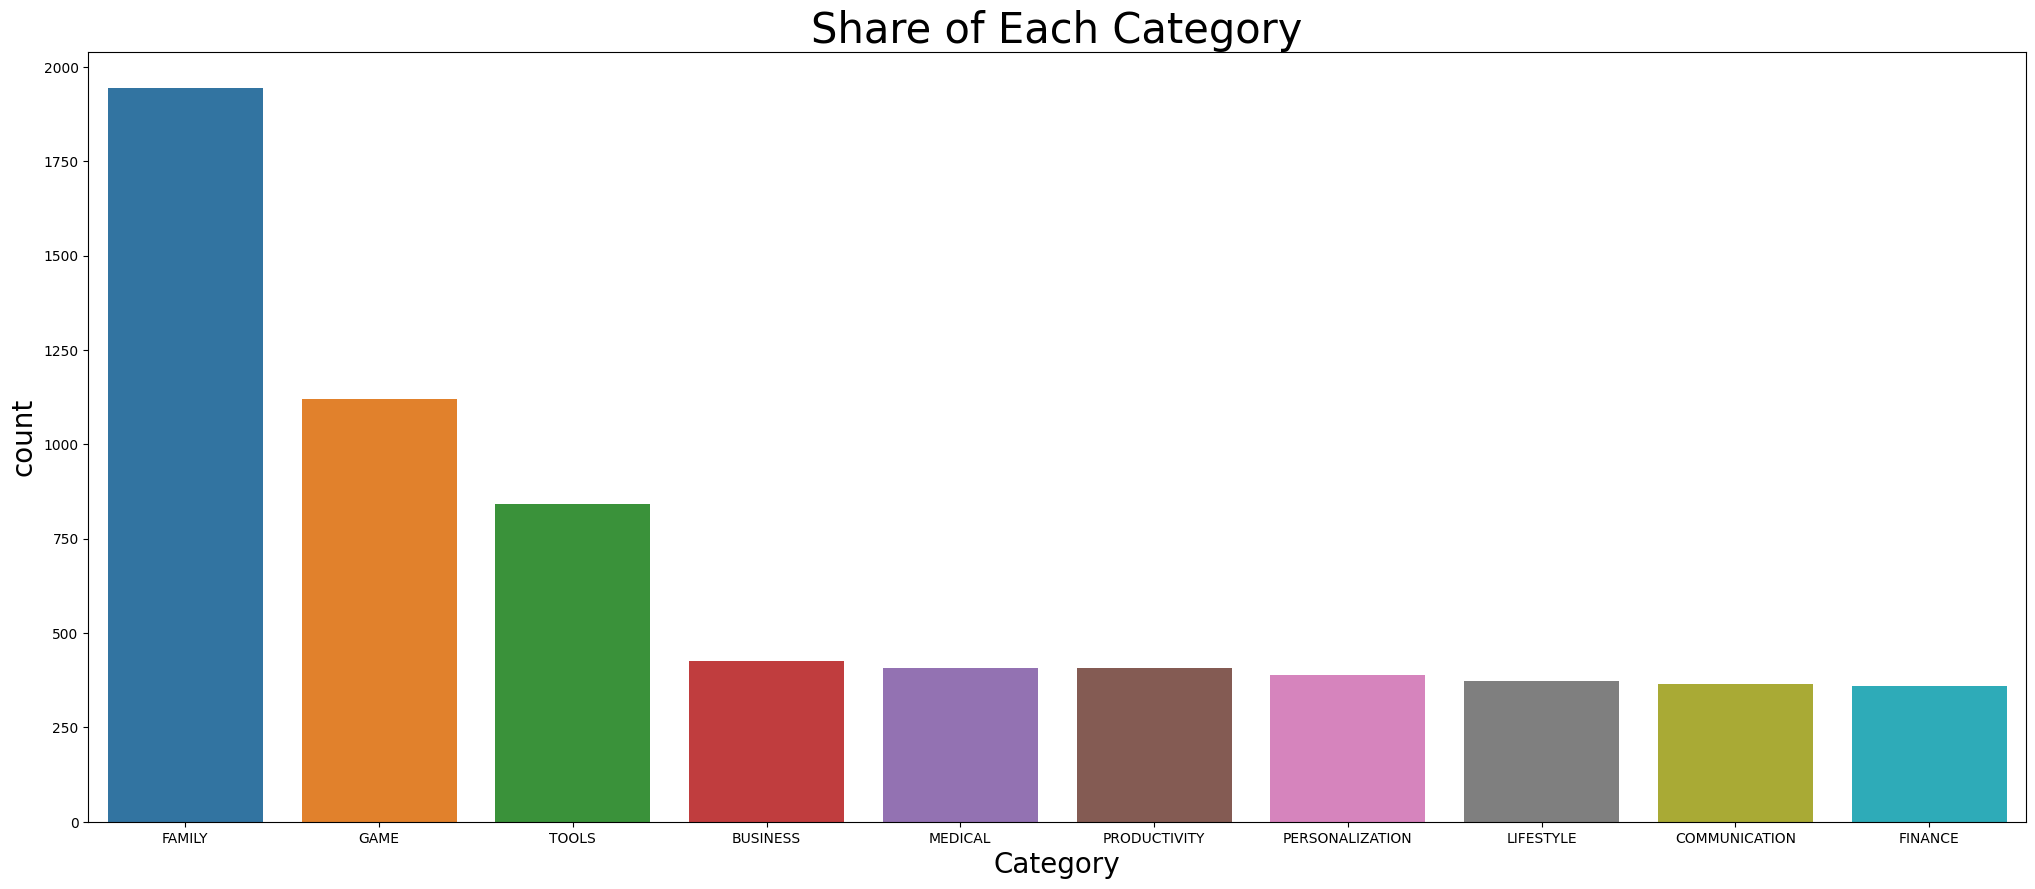

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Share of Each Category',fontsize=30)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)



sns.barplot(data=Category_Value_count,x='Category',y='count')

## What deterimines what apps have the highes reviews ?

Though apps of category Family are most abundant on the play store, apps with under Game categor have the highest reviews. People to tend to interact more with these apps than any other apps. Given the recent trends in online gaming and gaming tournoments, it's no surprise that these fetch the highest rates for installs, Ratings, and reviews. That being said, Gaming would be the perfect market for a software developer looking to deploy on Google Play Store, Followed by Social Media apps, and Communication.

In [ ]:
# Group the categoryu
app_reviews_nu = df.groupby('Category')['Reviews'].sum()
app_reviews_nu

Category
1.9                    3.000000e+00
ART_AND_DESIGN         1.714440e+06
AUTO_AND_VEHICLES      1.163666e+06
BEAUTY                 3.962400e+05
BOOKS_AND_REFERENCE    2.187323e+07
BUSINESS               1.235817e+07
COMICS                 3.383276e+06
COMMUNICATION          6.012736e+08
DATING                 5.545397e+06
EDUCATION              2.316550e+07
ENTERTAINMENT          4.757072e+07
EVENTS                 1.610180e+05
FAMILY                 3.967720e+08
FINANCE                1.699989e+07
FOOD_AND_DRINK         7.671576e+06
GAME                   1.415537e+09
HEALTH_AND_FITNESS     3.084519e+07
HOUSE_AND_HOME         2.794772e+06
LIBRARIES_AND_DEMO     1.037118e+06
LIFESTYLE              1.282058e+07
MAPS_AND_NAVIGATION    3.065925e+07
MEDICAL                1.396757e+06
NEWS_AND_MAGAZINES     3.824587e+07
PARENTING              9.583310e+05
PERSONALIZATION        7.519316e+07
PHOTOGRAPHY            2.042974e+08
PRODUCTIVITY           1.025545e+08
SHOPPING           

<Axes: title={'center': 'Installation by Catogories'}, xlabel='Installs', ylabel='Category'>

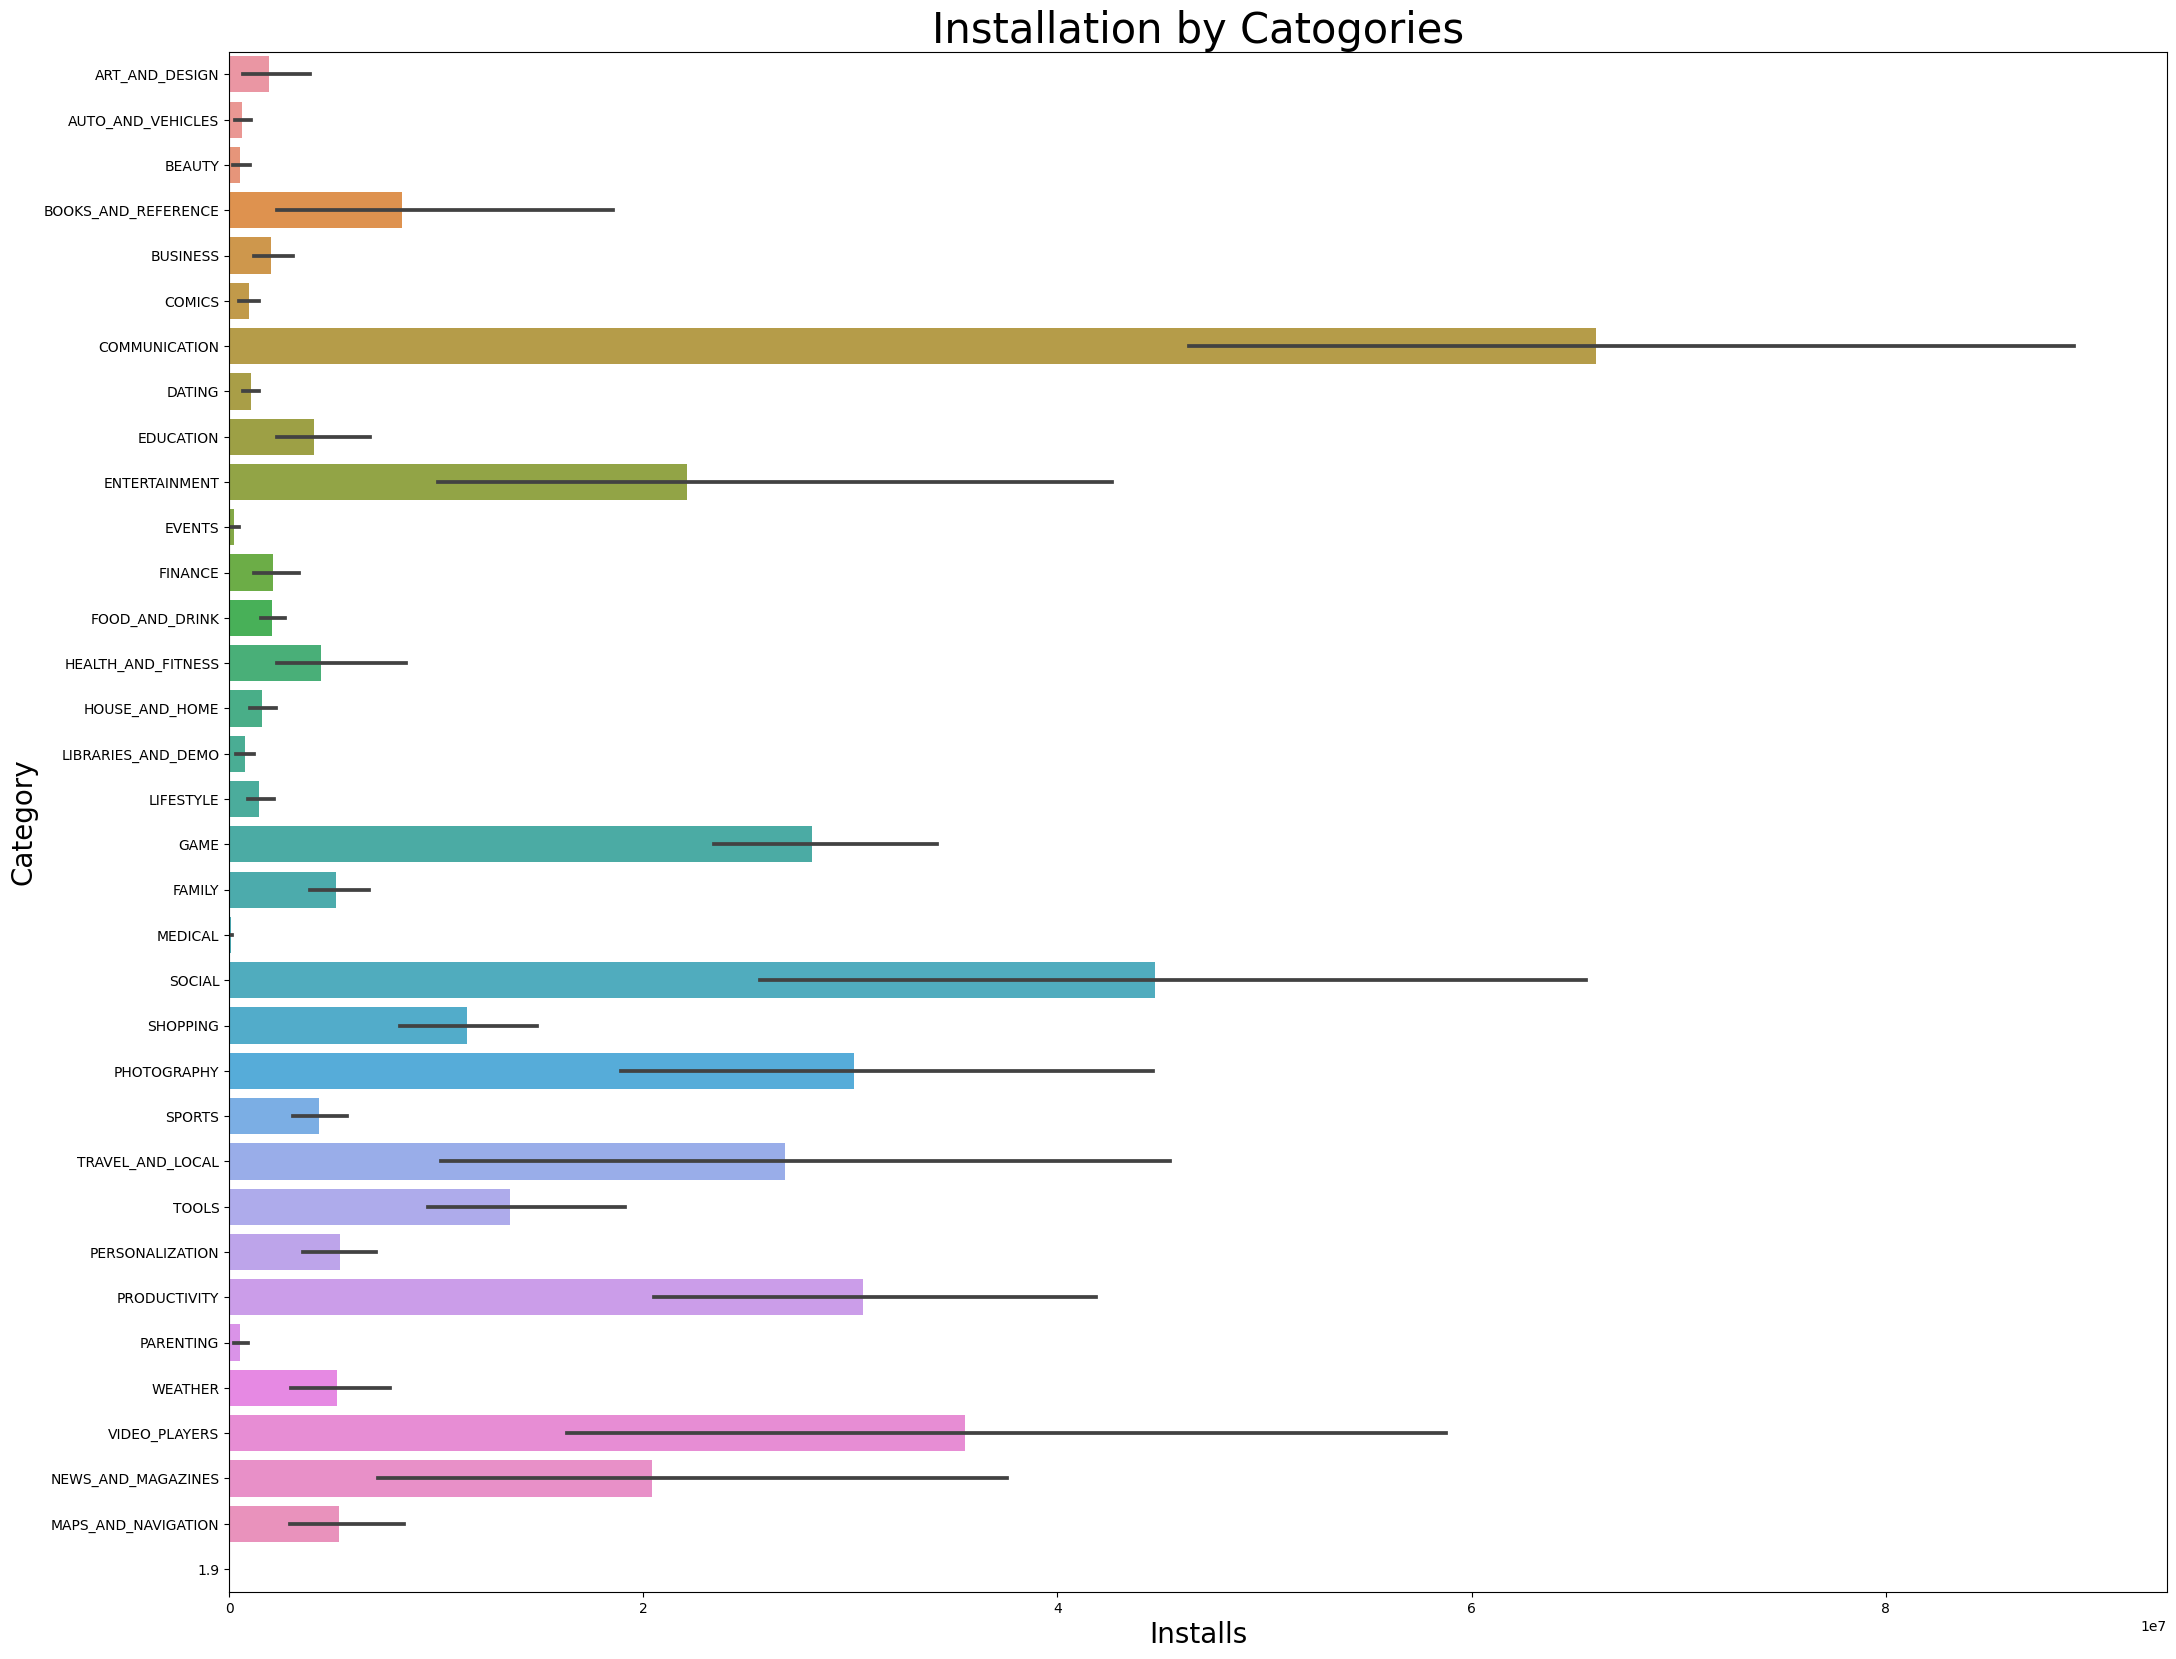

In [ ]:
plt.figure(figsize=(25,20))
plt.title('Installation by Catogories',fontsize=30)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)
sns.barplot(data=df,y='Category',x='Installs')

<Axes: title={'center': 'App Catogories VS App Price'}, xlabel='Price', ylabel='Category'>

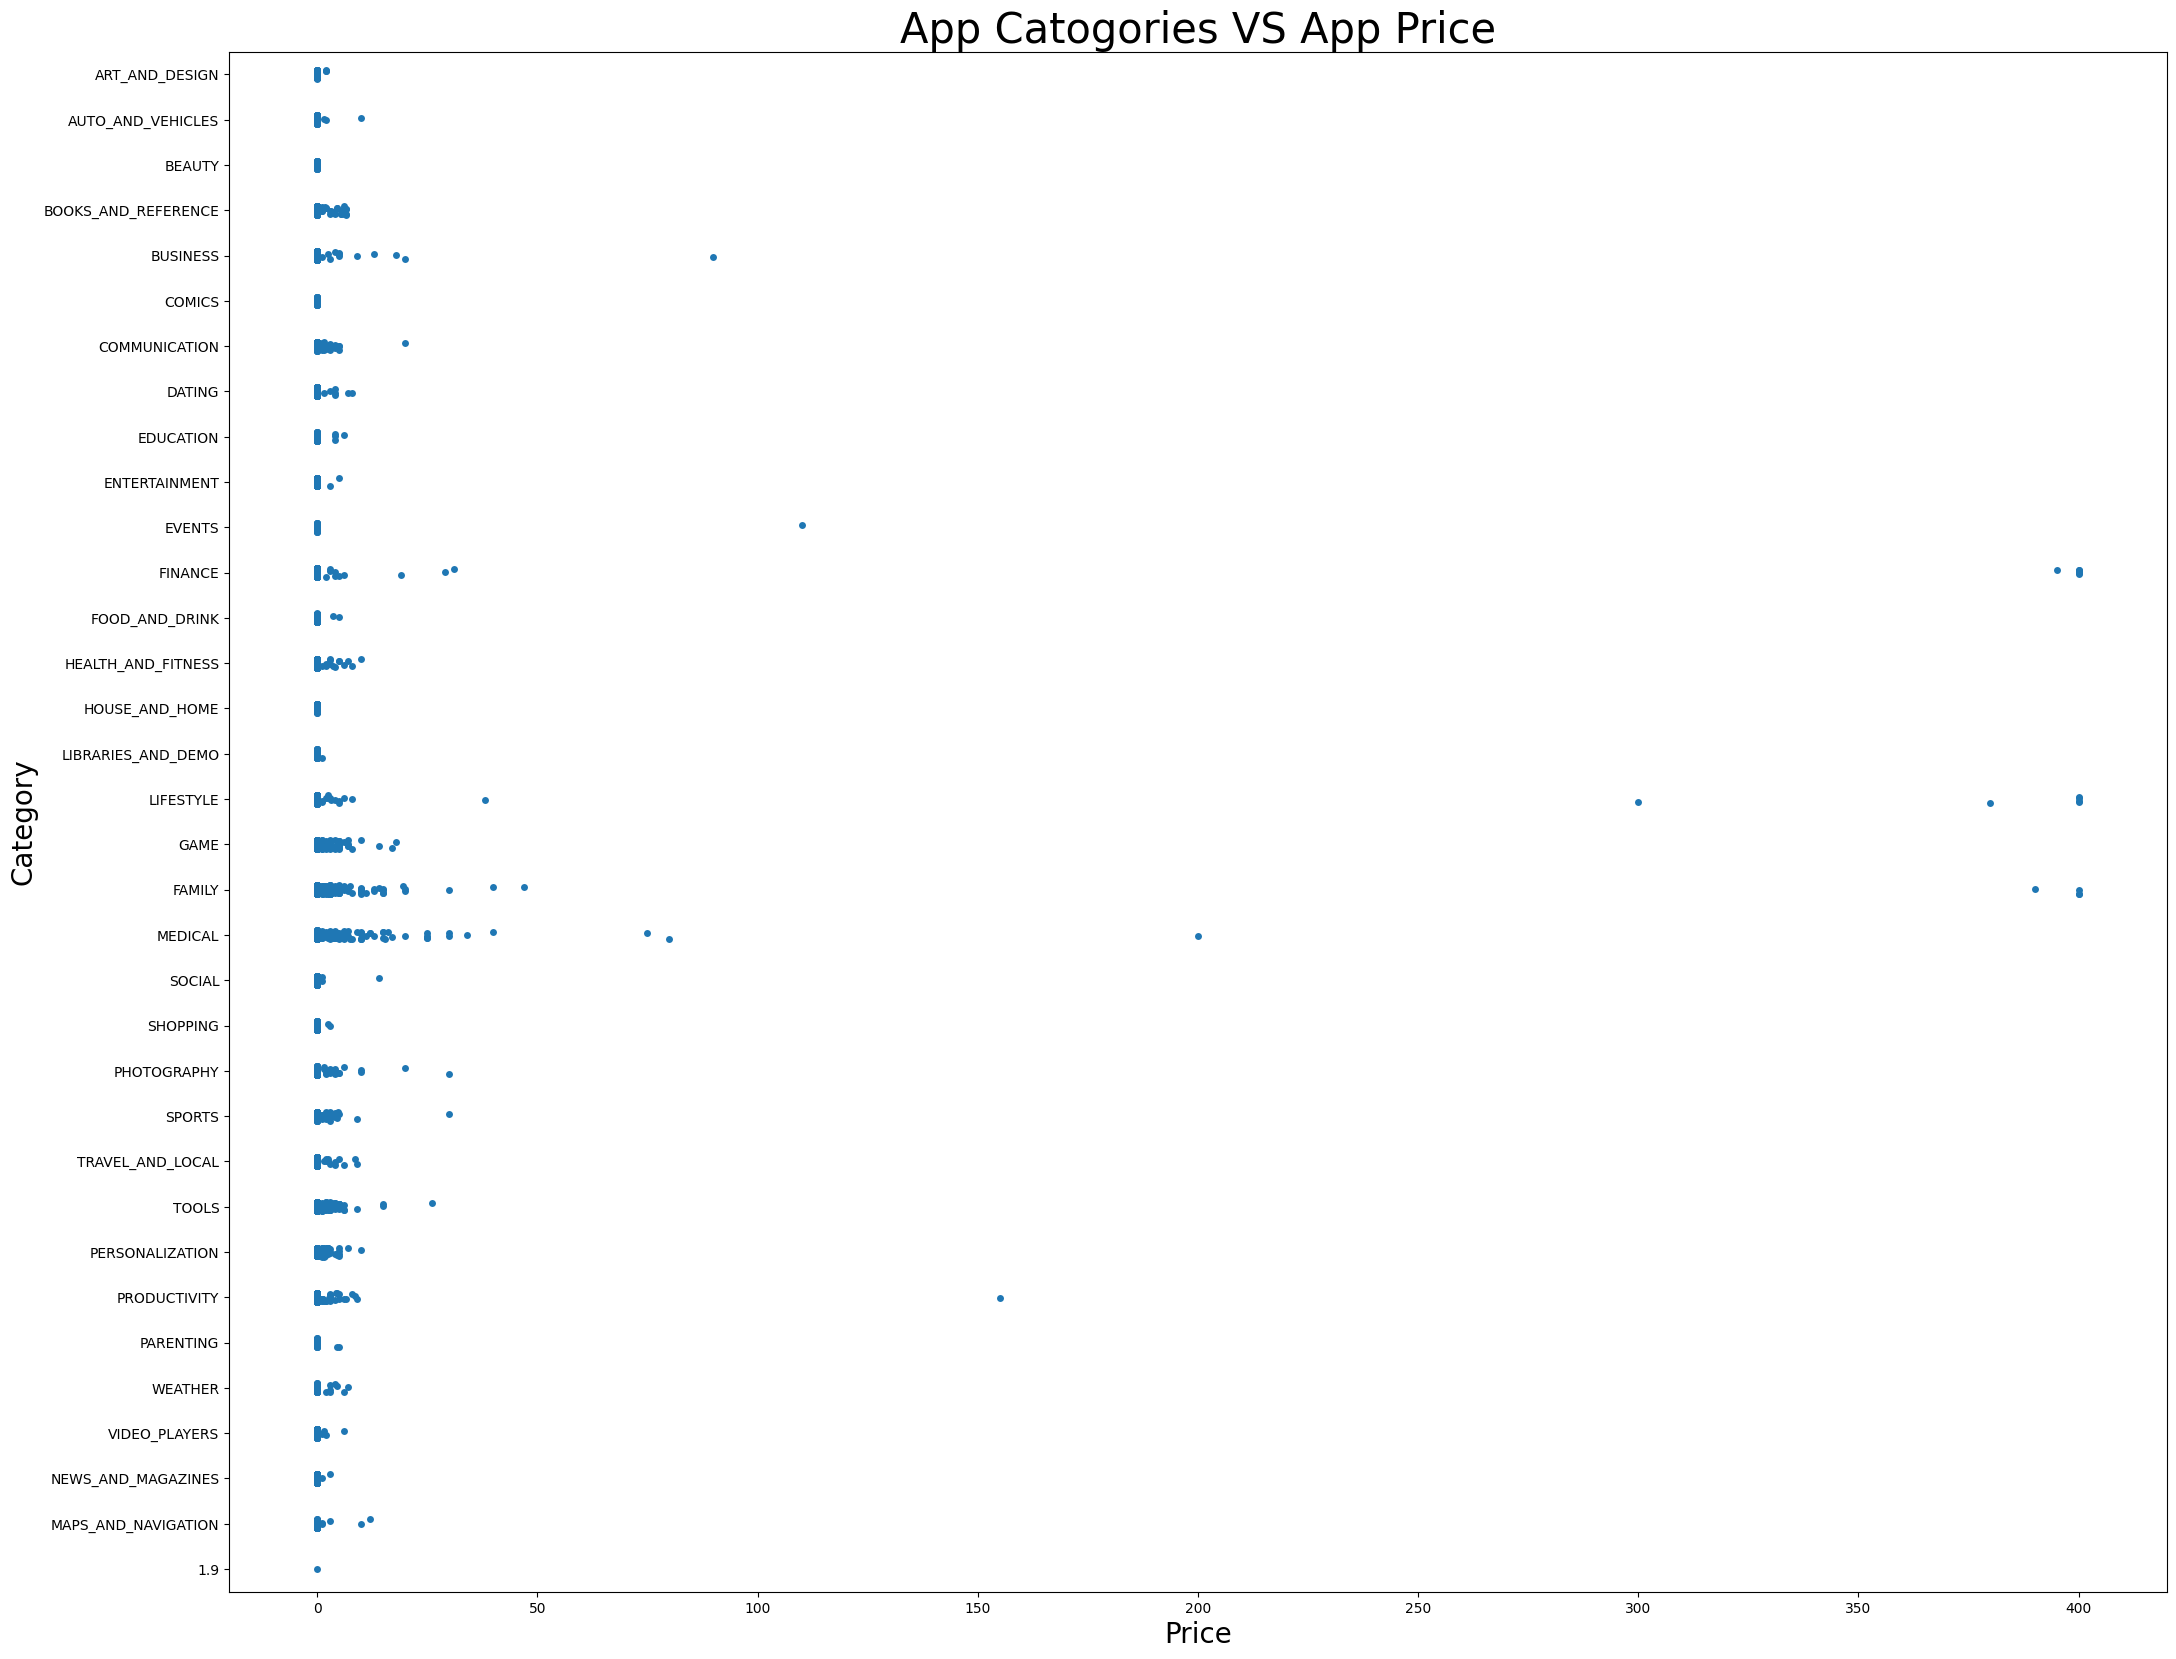

In [ ]:
plt.figure(figsize=(25,20))
plt.title('App Catogories VS App Price',fontsize=30)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)
sns.stripplot(y='Category', x='Price', data=df)

In [ ]:
df['Type'] = df['Type'].str.replace('0','Free')
type_value_counts = df['Type'].value_counts().reset_index()
type_value_counts


,Type,count
0,Free,9593
1,Paid,765


<Axes: title={'center': 'Paid Vs unpaid App'}, xlabel='Type', ylabel='count'>

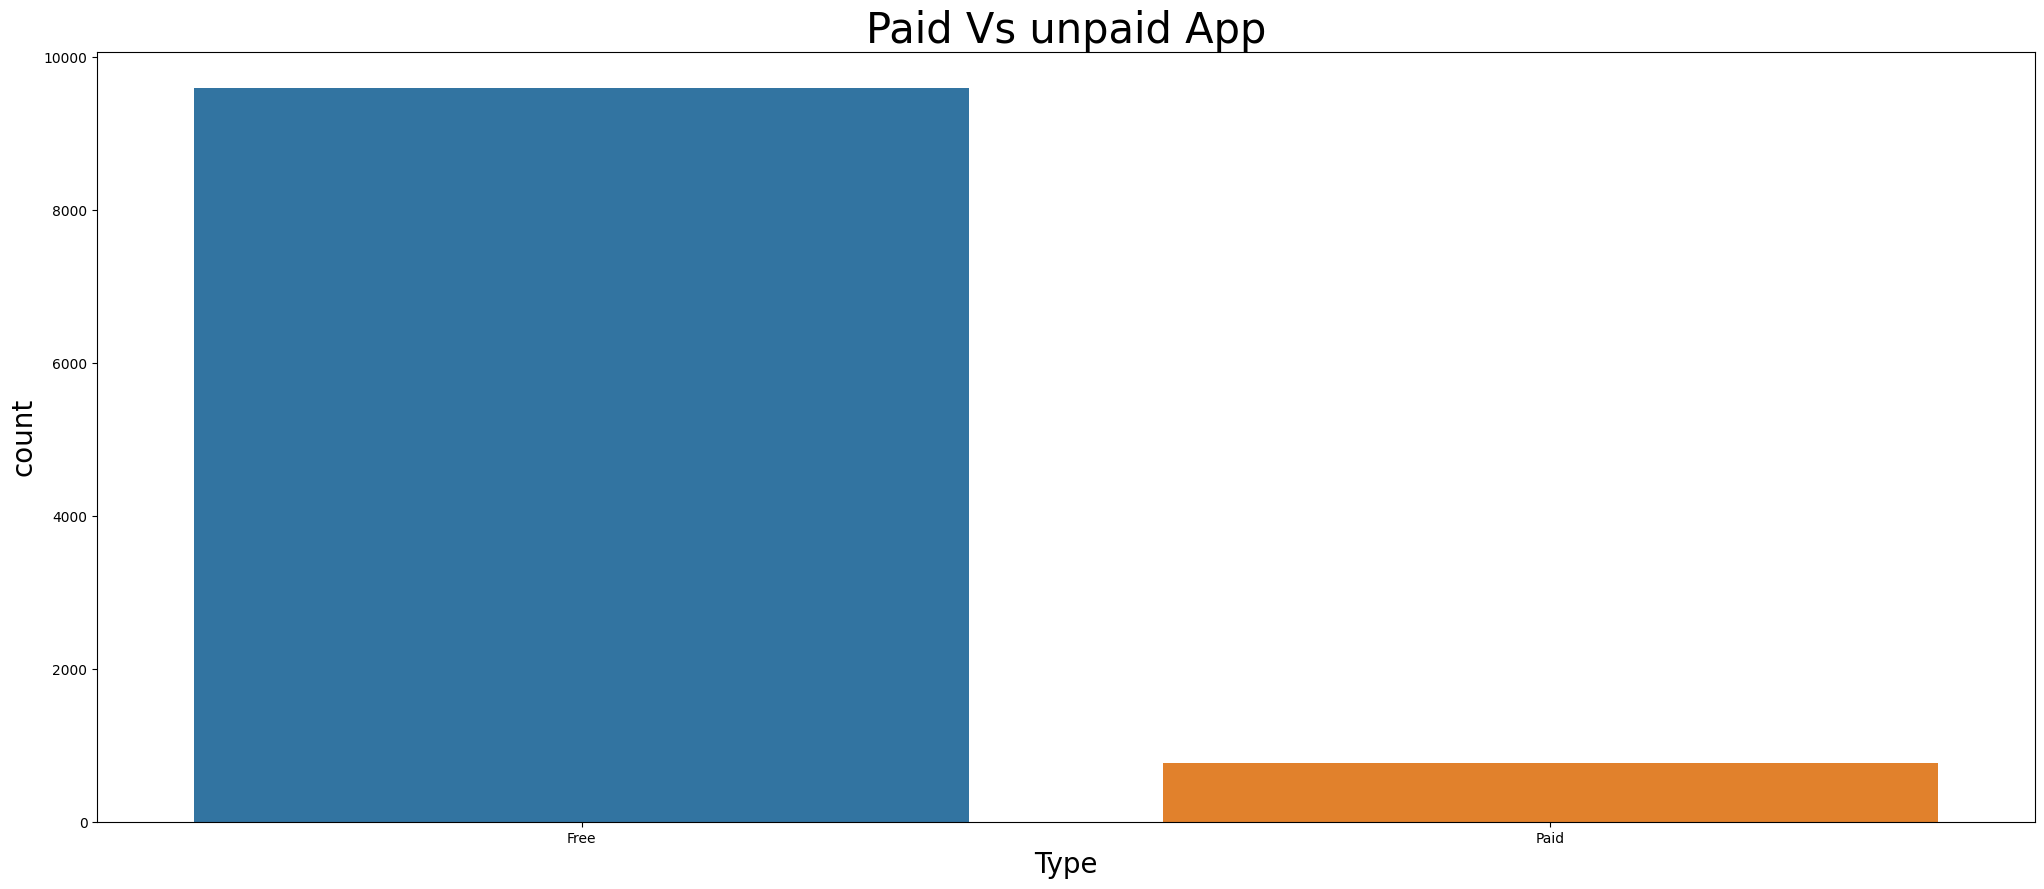

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Paid Vs unpaid App',fontsize=30)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)



sns.barplot(data=type_value_counts,x='Type',y='count')

<Axes: title={'center': 'Distribution of Rating'}, xlabel='Rating', ylabel='Count'>

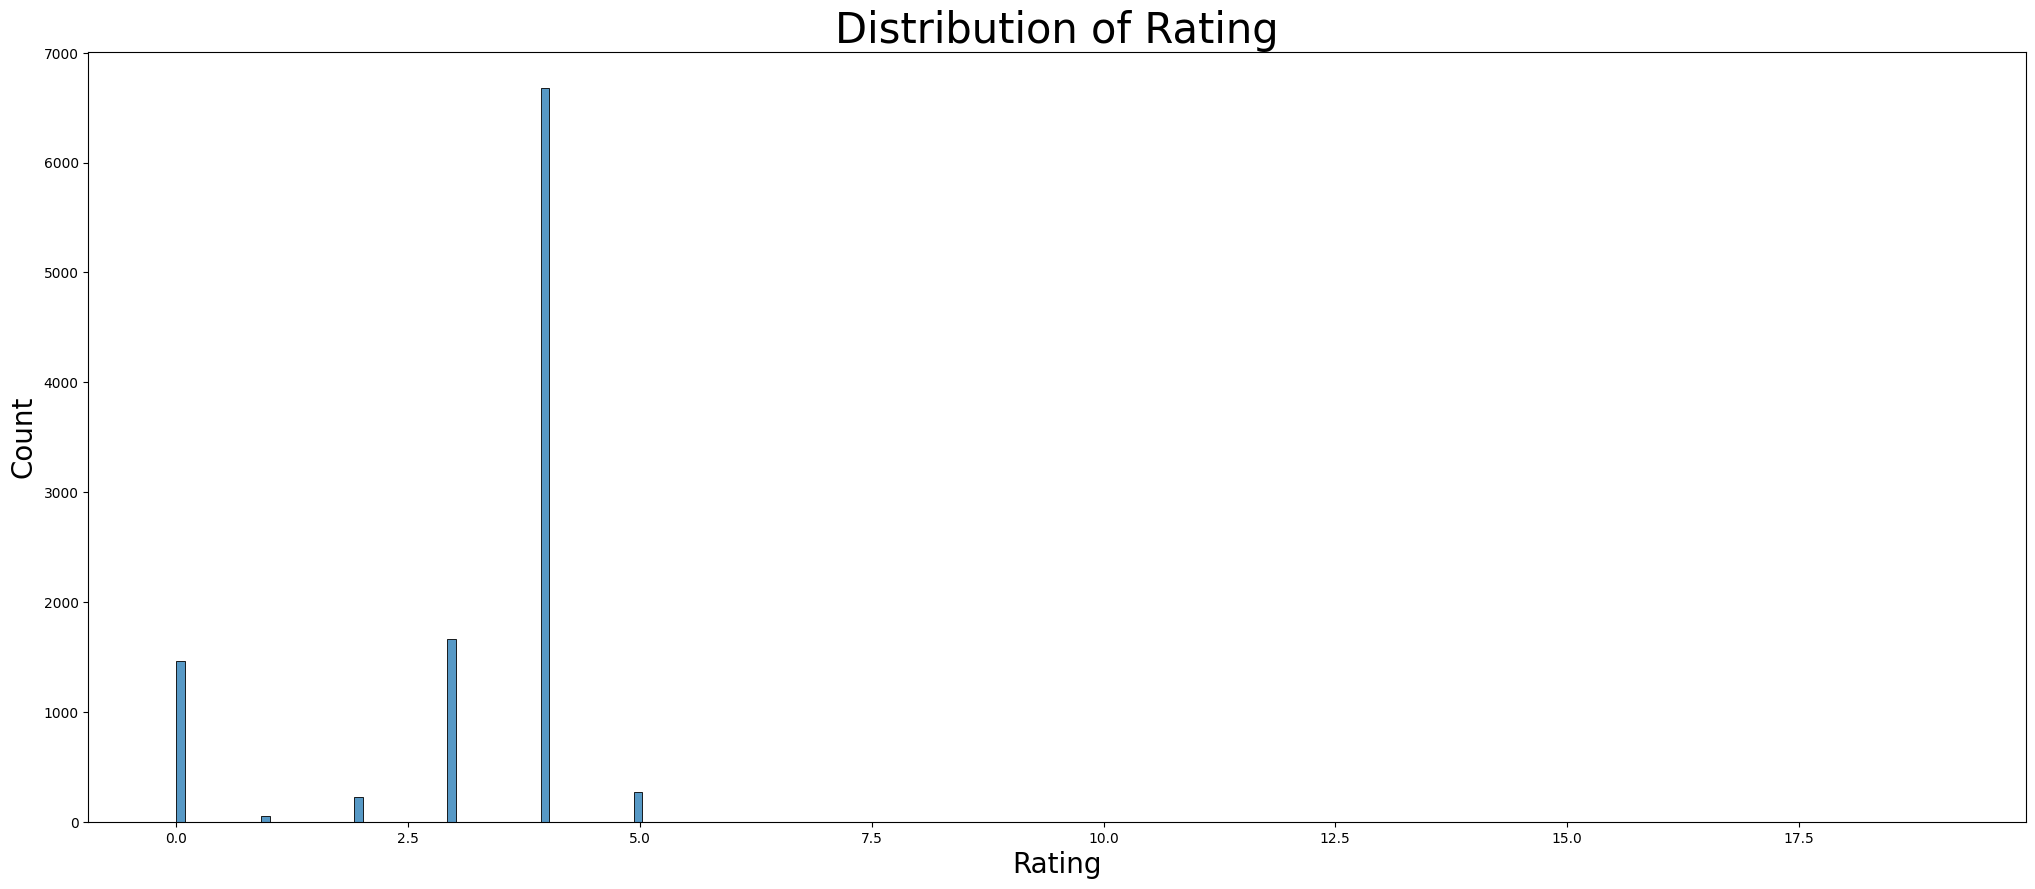

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Distribution of Rating',fontsize=30)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)
sns.histplot(data=df,x='Rating')

<Axes: title={'center': 'Distribution of Price'}, xlabel='Price', ylabel='Count'>

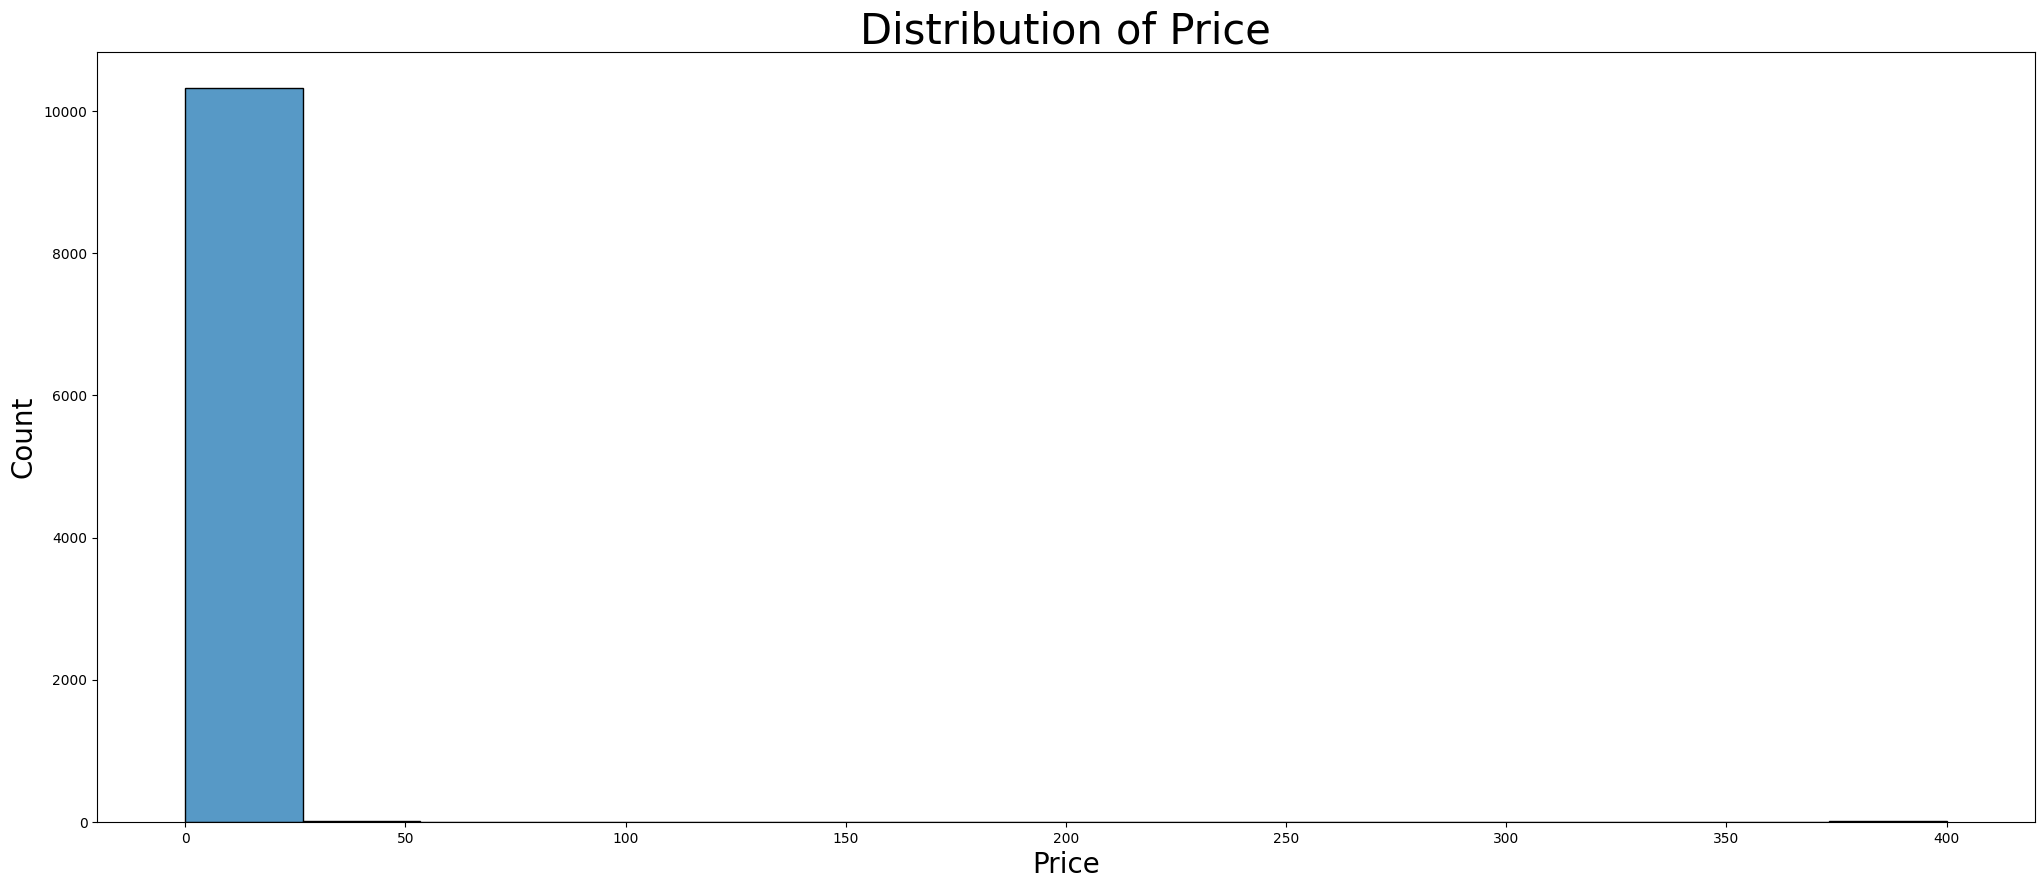

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Distribution of Price',fontsize=30)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)
sns.histplot(data=df,x='Price')

In [ ]:
Content_count = df['Content Rating'].value_counts()
Content_count

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Content Rating'}, xlabel='Content Rating', ylabel='count'>

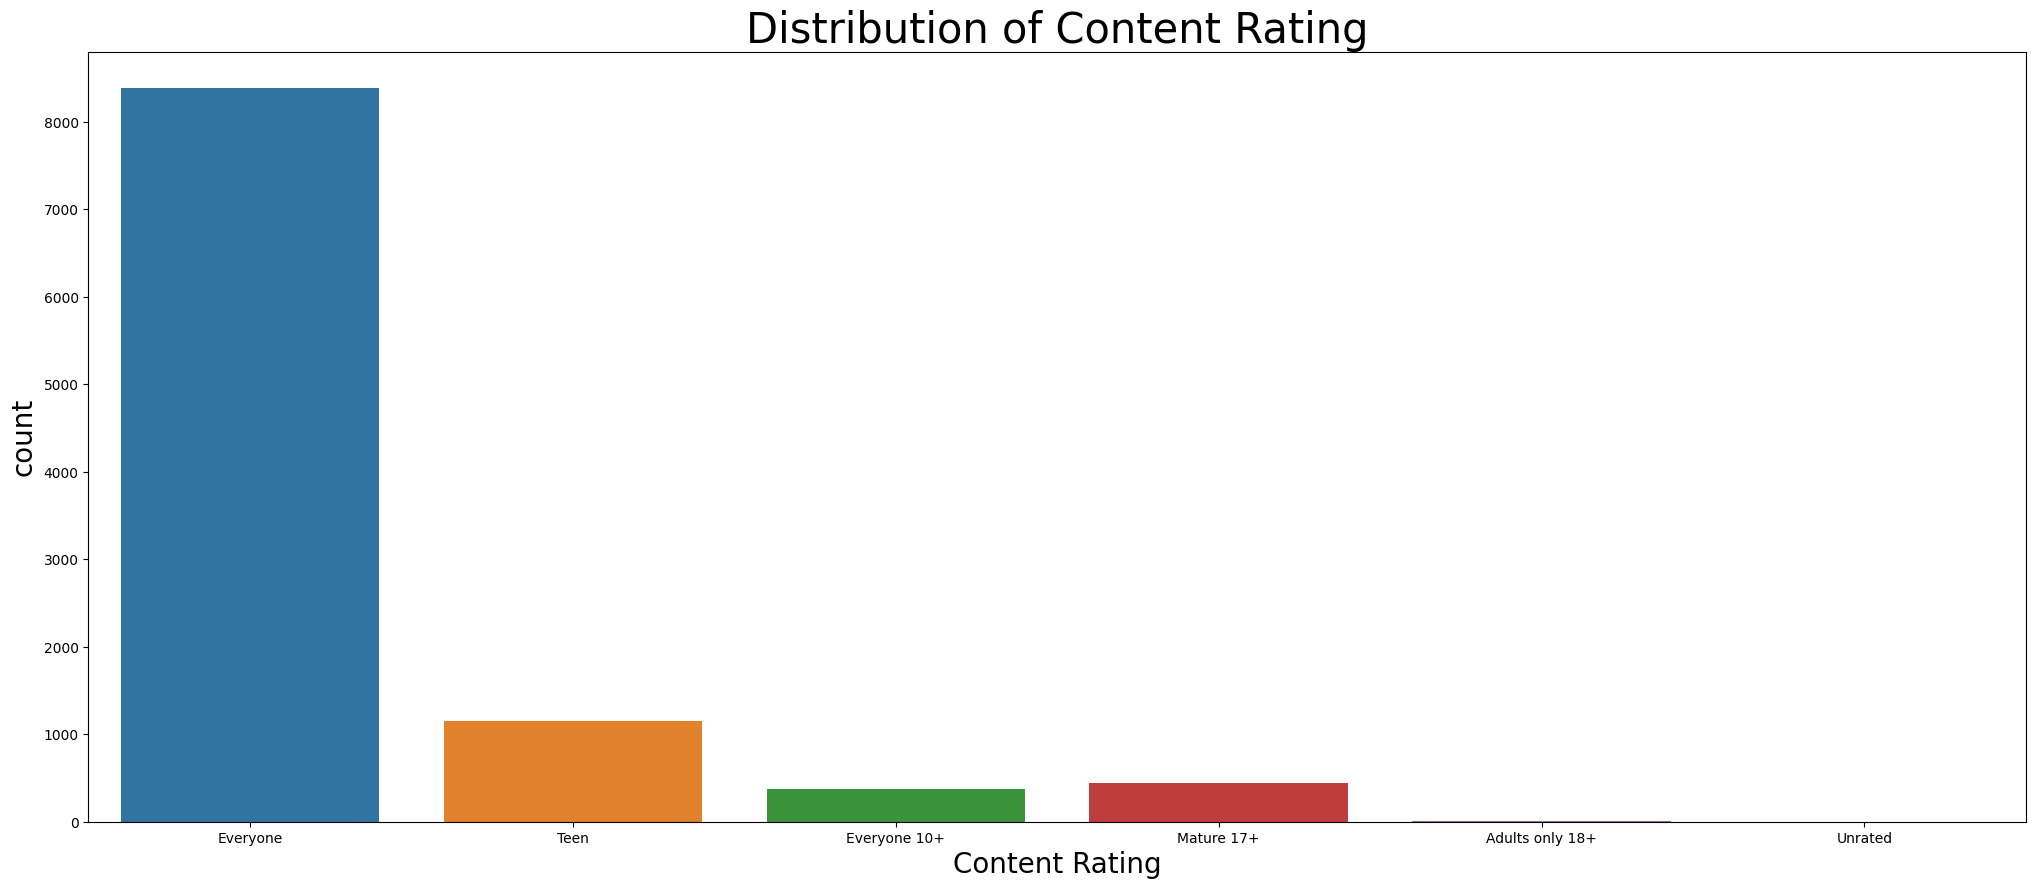

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Distribution of Content Rating',fontsize=30)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)

sns.countplot(data=df,x='Content Rating')

<Axes: title={'center': 'Distribution of Updatetion between date'}, xlabel='Last Updated', ylabel='Count'>

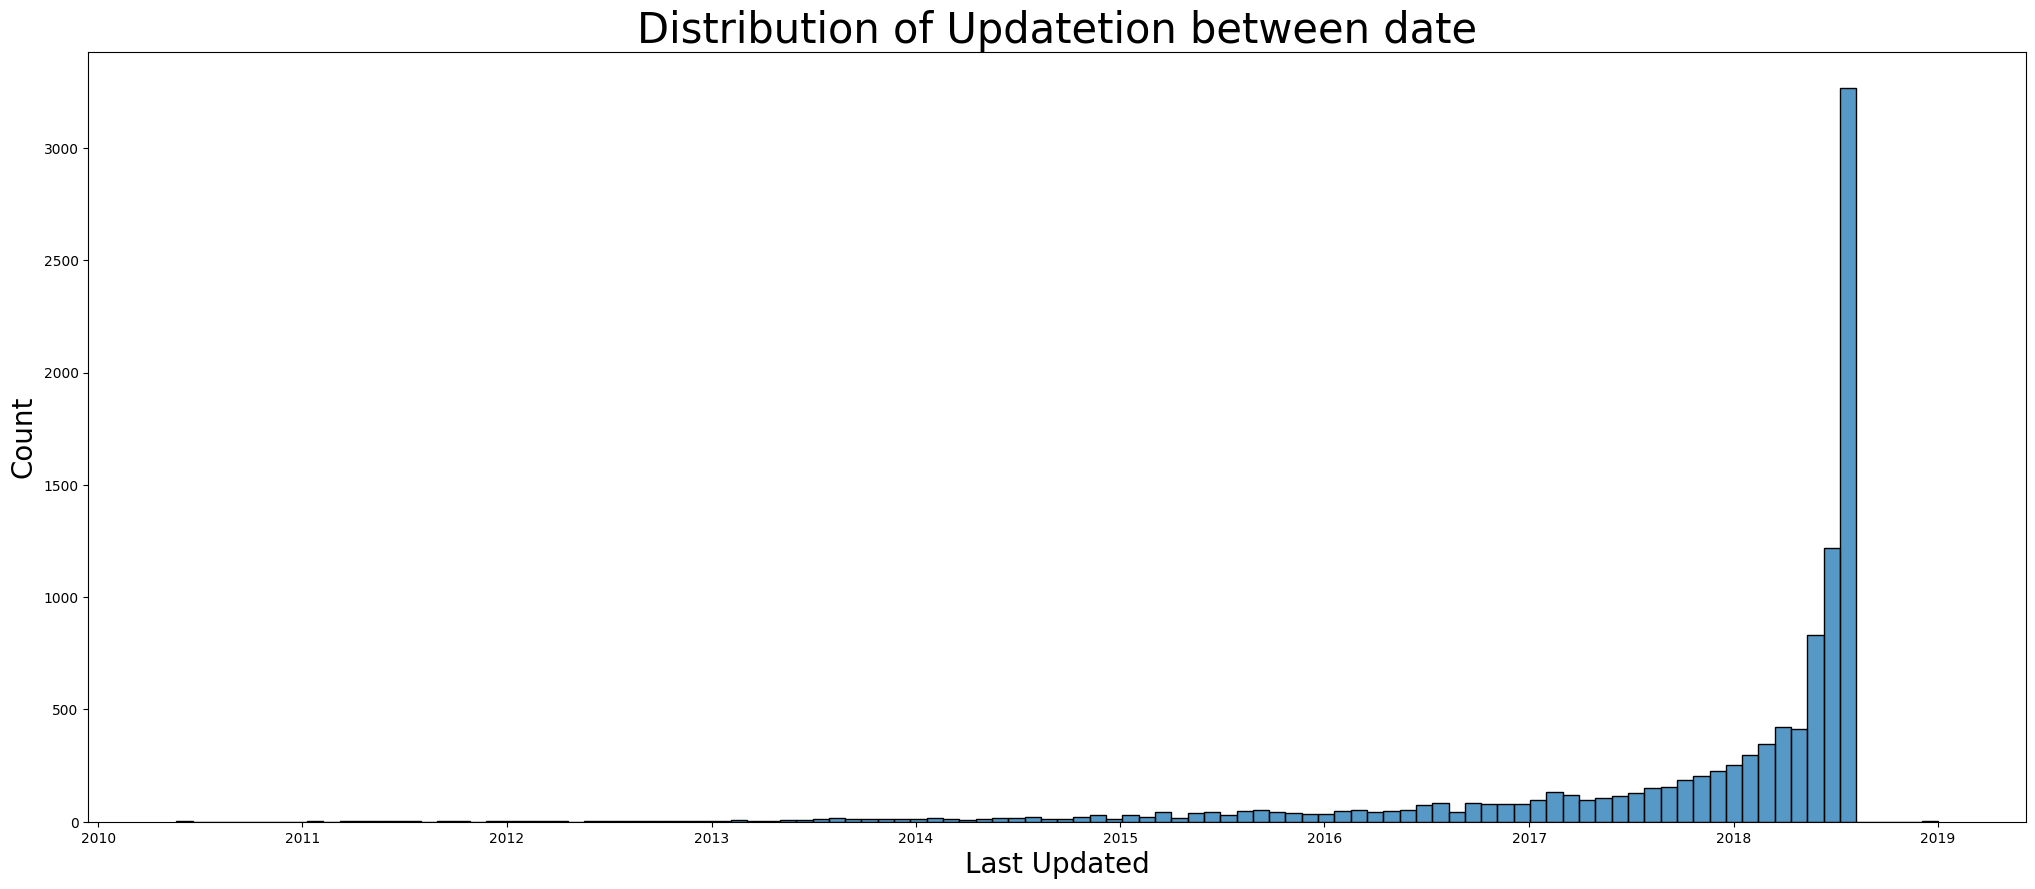

In [215]:
plt.figure(figsize=(25,10))
plt.title('Distribution of Updatetion between date',fontsize=30)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)
sns.histplot(data=df,x='Last Updated')

In [216]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

<Axes: title={'center': 'Installation by Catogories'}, xlabel='Installs', ylabel='Android Ver'>

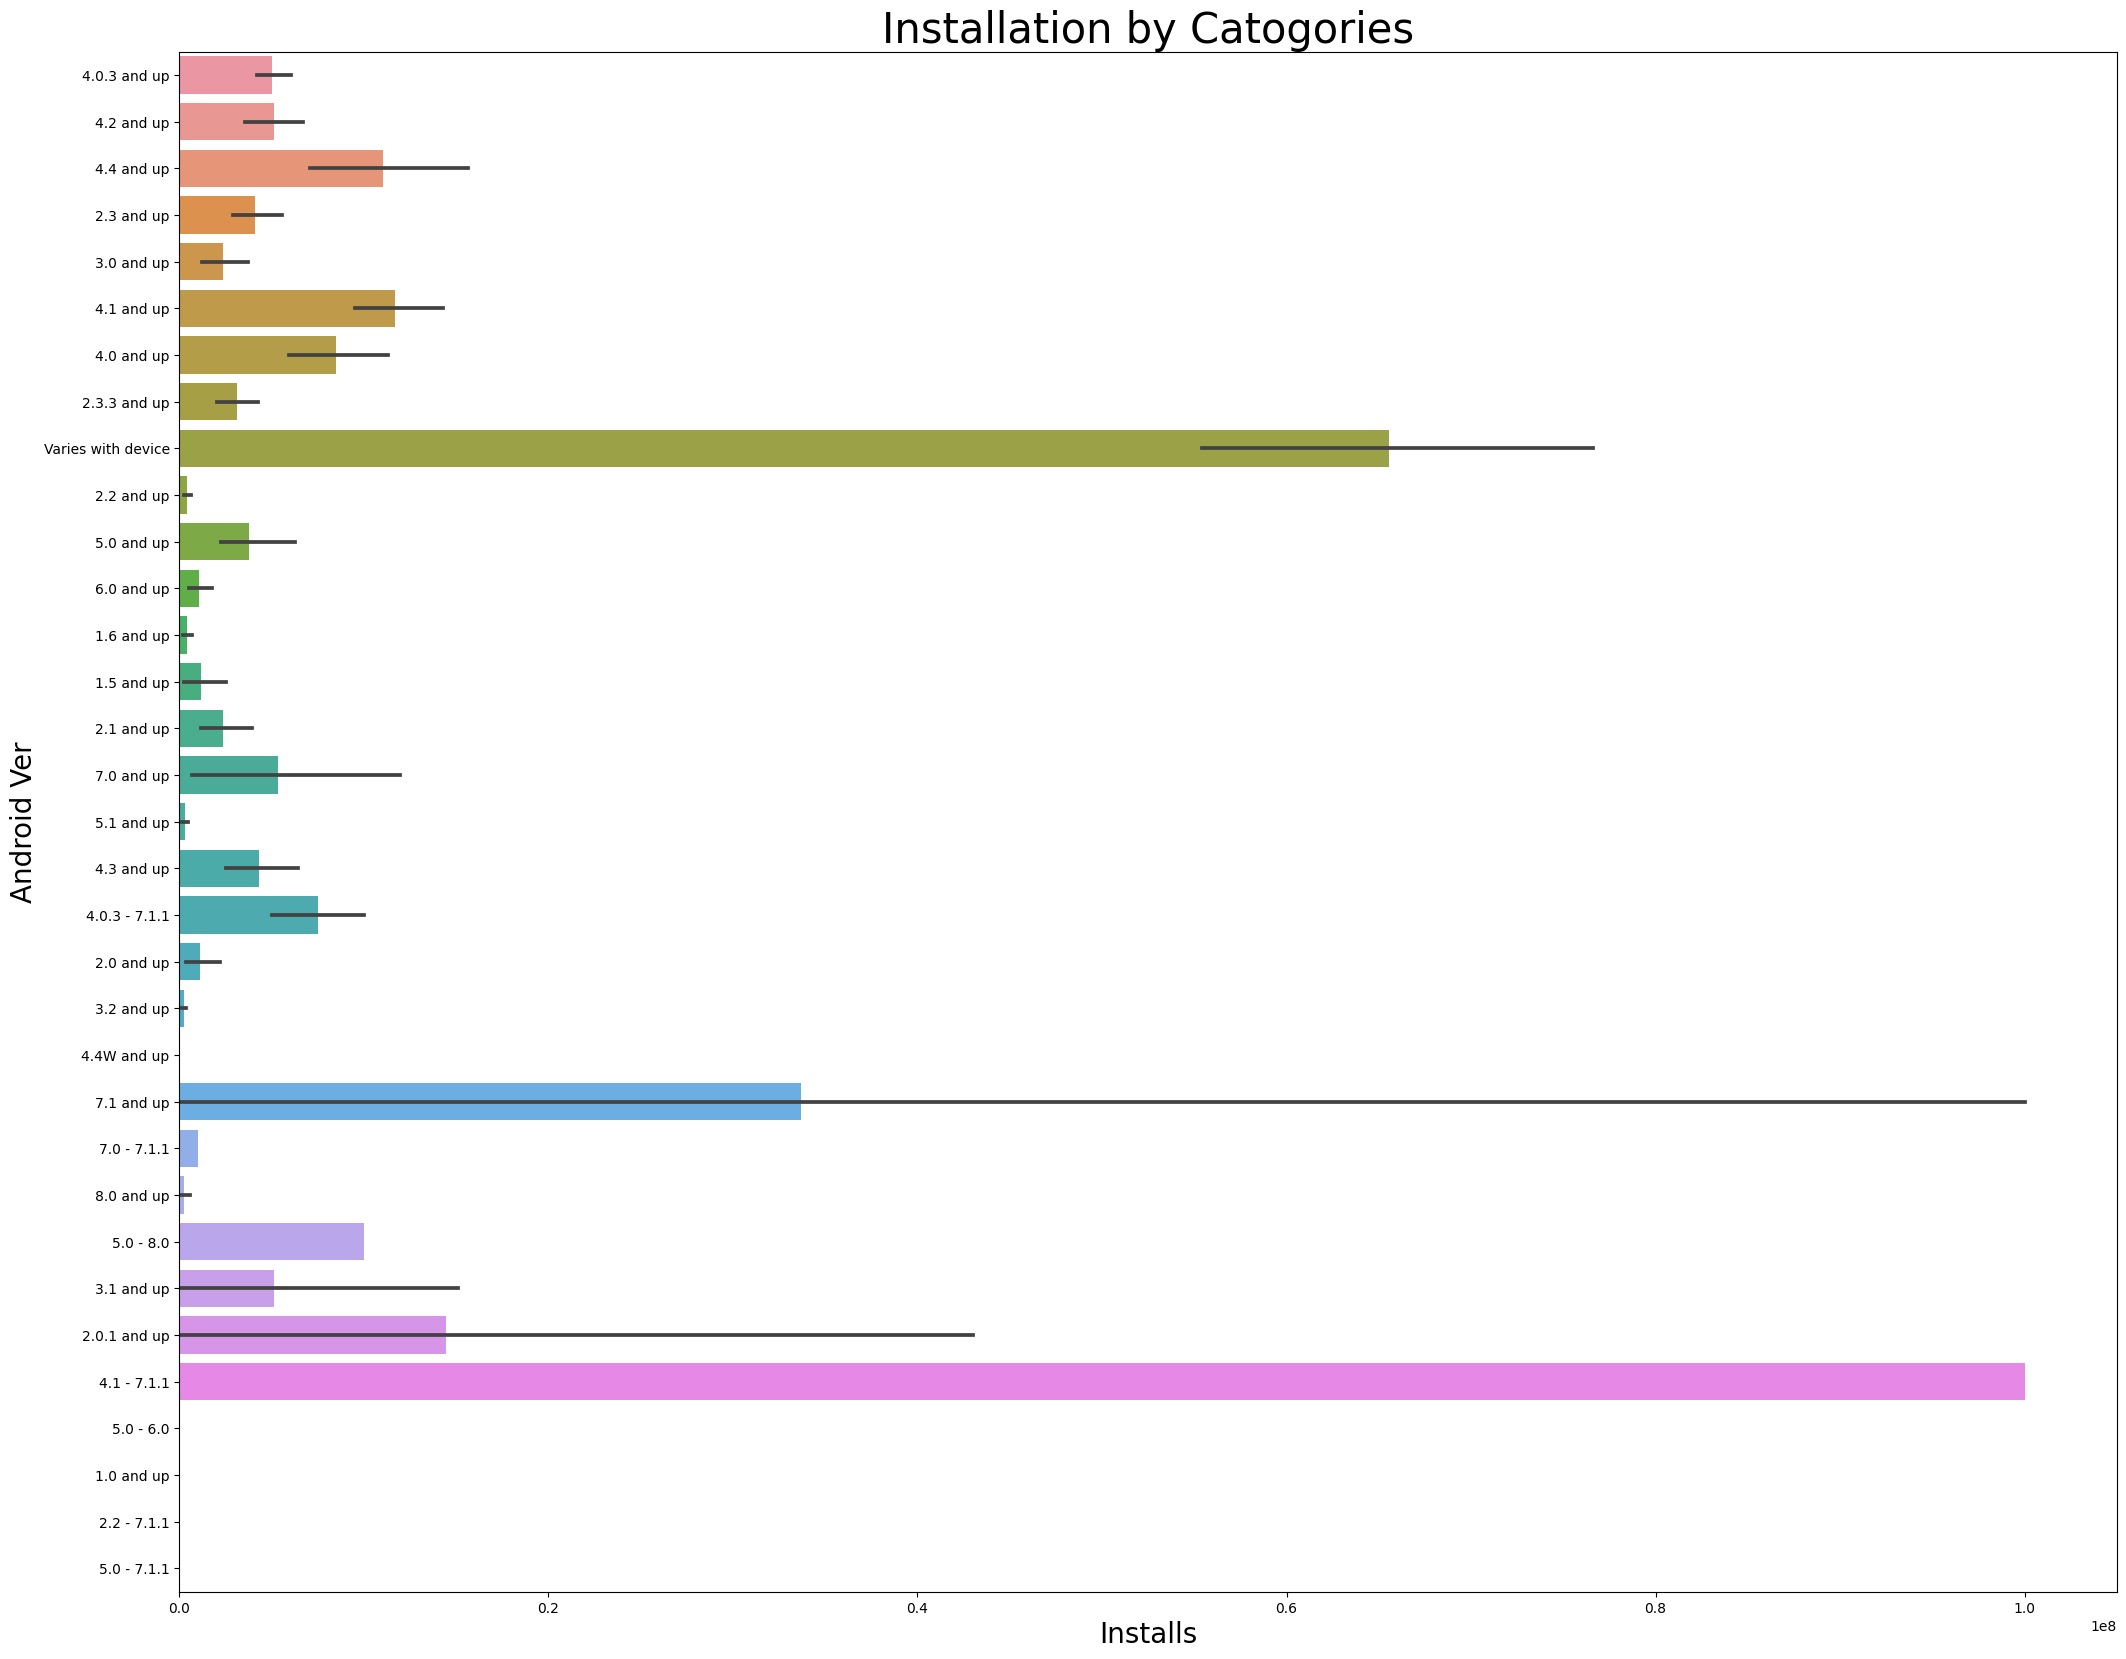

In [219]:
plt.figure(figsize=(25,20))
plt.title('Installation by Catogories',fontsize=30)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)
sns.barplot(data=df,y='Android Ver',x='Installs')

In [217]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4,38.0,53M,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4.0,3.6M,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0,3.0,9.5M,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4,114.0,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
